# Preparing Time Series from Wide-Form Data

## Libraries

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.ticker as mticks
import matplotlib.pyplot as plt
import seaborn as sns
import os

SEED = 321
np.random.seed(SEED)

## Part 1

### Dataframe

In [2]:
filename = 'Data\City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


### Filtering

In [3]:
filter_size = df["SizeRank"] < 4
filter_size

0         True
1         True
2         True
3         True
4        False
         ...  
22462    False
22463    False
22464    False
22465    False
22466    False
Name: SizeRank, Length: 22467, dtype: bool

In [4]:
df = df[filter_size]
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


### Melting the Data

In [5]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [6]:
melted = pd.melt(df.drop(columns=['StateName','SizeRank','RegionType']),
                 id_vars=['RegionID','RegionName','State','Metro','CountyName'],
                value_name='Value',var_name="Date")
melted

,RegionID,RegionName,State,Metro,CountyName,Date,Value
0,6181,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...
1087,17426,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [7]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   RegionName  1092 non-null   object        
 2   State       1092 non-null   object        
 3   Metro       1092 non-null   object        
 4   CountyName  1092 non-null   object        
 5   Date        1092 non-null   datetime64[ns]
 6   Value       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 59.8+ KB


In [8]:
melted = melted.set_index("Date")
melted

,RegionID,RegionName,State,Metro,CountyName,Value
Date,,,,,,
2000-01-31,6181,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...
2022-08-31,17426,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


### Resampling

In [9]:
df_ts = melted.groupby('RegionName').resample("M").sum()
df_ts

C:\Users\aliss\AppData\Local\Temp\ipykernel_5360\2520910870.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").sum()
C:\Users\aliss\AppData\Local\Temp\ipykernel_5360\2520910870.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").sum()
C:\Users\aliss\AppData\Local\Temp\ipykernel_5360\2520910870.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be 

RegionID     Value
RegionName Date                          
Chicago    2000-01-31     17426  166139.0
           2000-02-29     17426  166536.0
           2000-03-31     17426  167368.0
           2000-04-30     17426  168826.0
           2000-05-31     17426  170499.0
...                         ...       ...
New York   2022-05-31      6181  768797.0
           2022-06-30      6181  773944.0
           2022-07-31      6181  777692.0
           2022-08-31      6181  779960.0
           2022-09-30      6181  781622.0

[1092 rows x 2 columns]

## Part 2

### Plot of the Home Value by City

In [10]:
countries = ['Chicago','Houston','Los Angeles','New York']
plot_df = df_ts.loc[countries].copy()
plot_df

RegionID     Value
RegionName Date                          
Chicago    2000-01-31     17426  166139.0
           2000-02-29     17426  166536.0
           2000-03-31     17426  167368.0
           2000-04-30     17426  168826.0
           2000-05-31     17426  170499.0
...                         ...       ...
New York   2022-05-31      6181  768797.0
           2022-06-30      6181  773944.0
           2022-07-31      6181  777692.0
           2022-08-31      6181  779960.0
           2022-09-30      6181  781622.0

[1092 rows x 2 columns]

In [11]:
plot_df.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [12]:
plot_df.index.get_level_values(1)

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

In [13]:
unstacked = plot_df.unstack(level=0)
unstacked

RegionID                                  Value            \
RegionName  Chicago Houston Los Angeles New York   Chicago   Houston   
Date                                                                   
2000-01-31    17426   39051       12447     6181  166139.0  109068.0   
2000-02-29    17426   39051       12447     6181  166536.0  109079.0   
2000-03-31    17426   39051       12447     6181  167368.0  108878.0   
2000-04-30    17426   39051       12447     6181  168826.0  108881.0   
2000-05-31    17426   39051       12447     6181  170499.0  108834.0   
...             ...     ...         ...      ...       ...       ...   
2022-05-31    17426   39051       12447     6181  312487.0  265558.0   
2022-06-30    17426   39051       12447     6181  314663.0  268901.0   
2022-07-31    17426   39051       12447     6181  315910.0  271059.0   
2022-08-31    17426   39051       12447     6181  315587.0  272400.0   
2022-09-30    17426   39051       12447     6181  315429.0  272639.0   

                                  
RegionName Los Angeles  New York  
Date                              
2000-01-31    234181.0  253690.0  
2000-02-29    234401.0  255517.0  
2000-03-31    235513.0  257207.0  
2000-04-30    237589.0  260310.0  
2000-05-31    240113.0  263204.0  
...                ...       ...  
2022-05-31    990391.0  768797.0  
2022-06-30    992337.0  773944.0  
2022-07-31    992630.0  777692.0  
2022-08-31    978196.0  779960.0  
2022-09-30    966595.0  781622.0  

[273 rows x 8 columns]

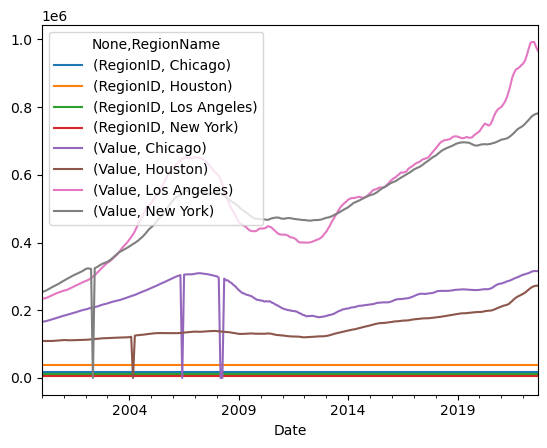

In [14]:
ax = unstacked.plot()

In [15]:
unstacked.columns

MultiIndex([('RegionID',     'Chicago'),
            ('RegionID',     'Houston'),
            ('RegionID', 'Los Angeles'),
            ('RegionID',    'New York'),
            (   'Value',     'Chicago'),
            (   'Value',     'Houston'),
            (   'Value', 'Los Angeles'),
            (   'Value',    'New York')],
           names=[None, 'RegionName'])

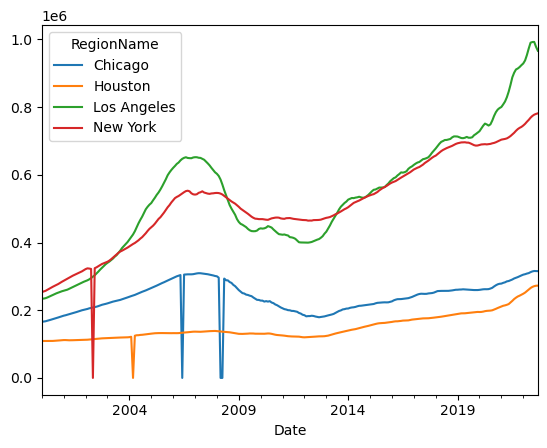

In [16]:
ax = unstacked['Value'].plot()

In [17]:
str_fmt = mticks.StrMethodFormatter("{x:,.0f}")
str_fmt

In [18]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

fmt_thous = mticks.FuncFormatter(thousands)

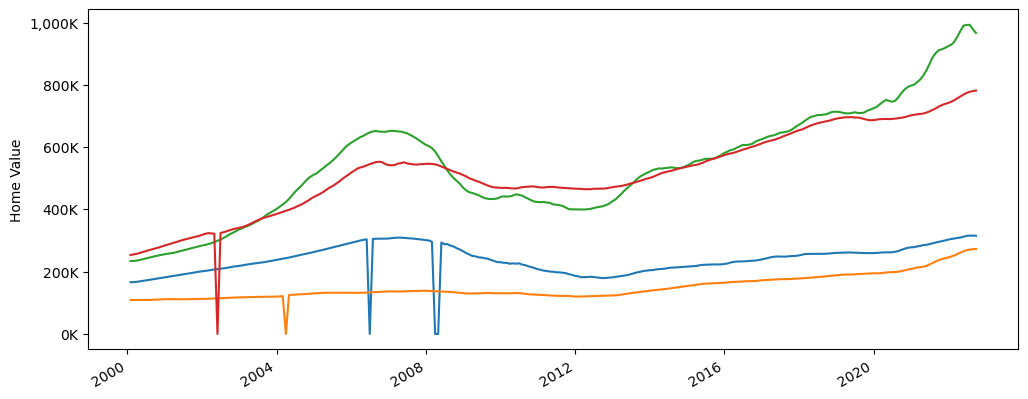

In [19]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(unstacked.index, unstacked['Value'],label='Cases')
ax.set_ylabel("Home Value")

ax.grid(False)

ax.yaxis.set_major_formatter(fmt_thous)

lines = ax.get_lines()
labels = [l.get_label() for l in lines]
fig.autofmt_xdate()

### Questions

####  Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [20]:
c_cases = df_ts.loc["Chicago",'Value']
h_cases = df_ts.loc['Houston','Value']
la_cases = df_ts.loc["Los Angeles",'Value']
ny_cases = df_ts.loc['New York','Value']

In [21]:
compare_ts = pd.DataFrame({'Chicago':c_cases,
                           'Houston':h_cases,
                           'Los Angeles':la_cases,
                           'New York':ny_cases})
compare_ts

,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,166139.0,109068.0,234181.0,253690.0
2000-02-29,166536.0,109079.0,234401.0,255517.0
2000-03-31,167368.0,108878.0,235513.0,257207.0
2000-04-30,168826.0,108881.0,237589.0,260310.0
2000-05-31,170499.0,108834.0,240113.0,263204.0
...,...,...,...,...
2022-05-31,312487.0,265558.0,990391.0,768797.0
2022-06-30,314663.0,268901.0,992337.0,773944.0
2022-07-31,315910.0,271059.0,992630.0,777692.0


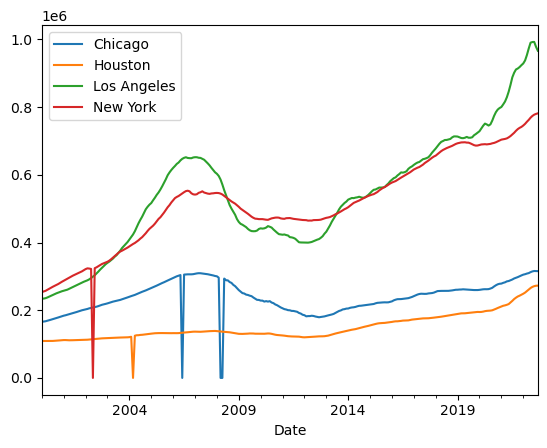

In [22]:
compare_ts.plot();

In [23]:
compare_diff = compare_ts.diff().dropna()
compare_diff

,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-02-29,397.0,11.0,220.0,1827.0
2000-03-31,832.0,-201.0,1112.0,1690.0
2000-04-30,1458.0,3.0,2076.0,3103.0
2000-05-31,1673.0,-47.0,2524.0,2894.0
2000-06-30,1509.0,232.0,2308.0,3002.0
...,...,...,...,...
2022-05-31,2838.0,4457.0,17223.0,6476.0
2022-06-30,2176.0,3343.0,1946.0,5147.0
2022-07-31,1247.0,2158.0,293.0,3748.0


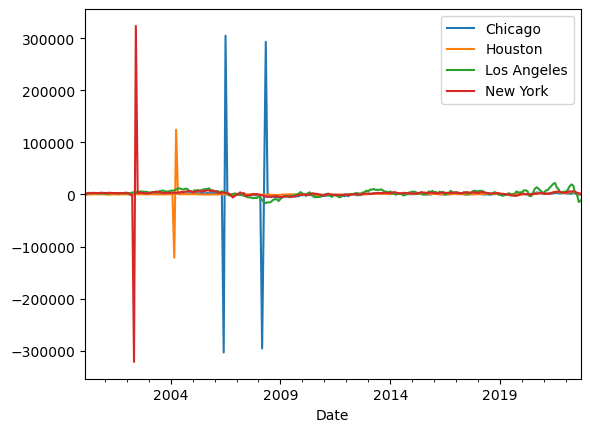

In [24]:
compare_diff.plot();

In [25]:
compare_pct = compare_ts.pct_change(freq='M')
compare_pct

,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,NaN,NaN,NaN,NaN
2000-02-29,0.002390,0.000101,0.000939,0.007202
2000-03-31,0.004996,-0.001843,0.004744,0.006614
2000-04-30,0.008711,0.000028,0.008815,0.012064
2000-05-31,0.009910,-0.000432,0.010623,0.011118
...,...,...,...,...
2022-05-31,0.009165,0.017070,0.017698,0.008495
2022-06-30,0.006963,0.012589,0.001965,0.006695
2022-07-31,0.003963,0.008025,0.000295,0.004843


In [26]:
compare_pct = compare_ts.pct_change(freq='D')*100
compare_pct

,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-05-31,NaN,NaN,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN
2022-07-31,NaN,NaN,NaN,NaN


In [27]:
plot_ts = compare_pct.loc['2008':]
plot_ts

,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-01-31,NaN,NaN,NaN,NaN
2008-02-29,NaN,NaN,NaN,NaN
2008-03-31,NaN,NaN,NaN,NaN
2008-04-30,NaN,NaN,NaN,NaN
2008-05-31,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-05-31,NaN,NaN,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN
2022-07-31,NaN,NaN,NaN,NaN


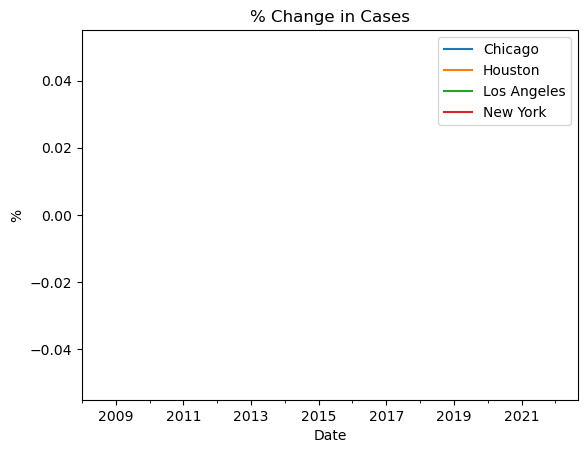

In [28]:
ax = plot_ts.plot(title='% Change in Cases',ylabel='%')

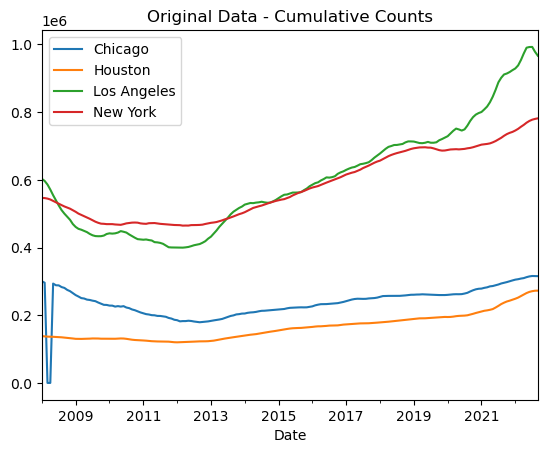

In [29]:
compare_ts.loc['2008':].plot(title='Original Data - Cumulative Counts');

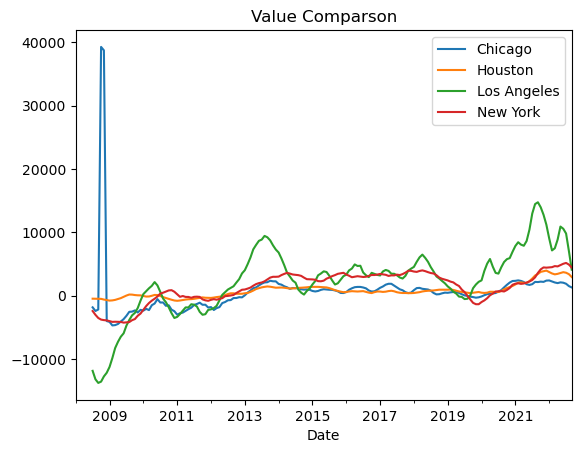

In [30]:
compare_diff.loc['2008':].rolling(7).mean().plot(title='Value Comparson');

#### How much did the home values change from November 2008 to December 2008 (in dollars)?

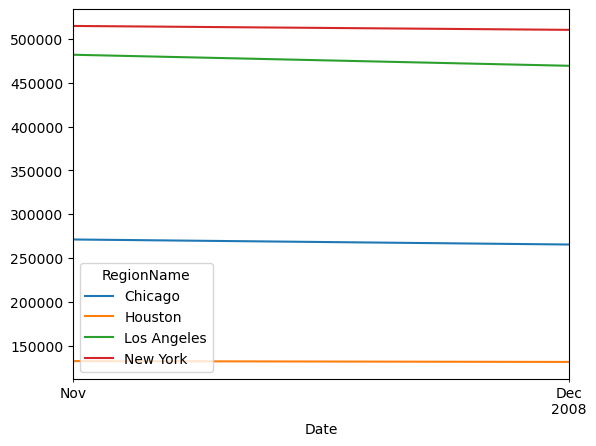

In [31]:
## selecting a single feature and smaller time period for demonstration
ts = unstacked.loc['11/2008':'12/2008','Value'].copy().dropna()
ts.plot();

In [32]:
window = 7
ts_mean = ts.rolling(window).mean()
ts_mean

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-30,NaN,NaN,NaN,NaN
2008-12-31,NaN,NaN,NaN,NaN


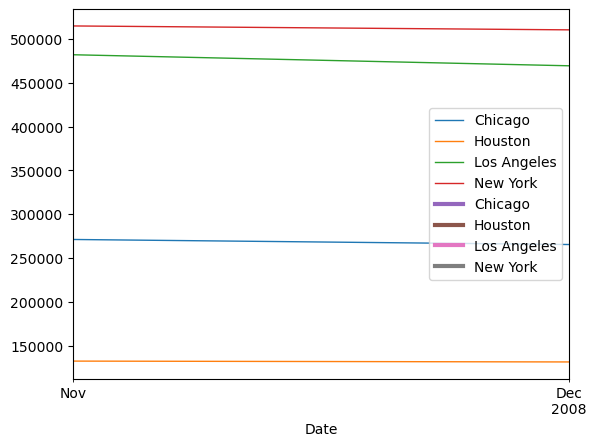

In [33]:
ax = ts.plot(label='Raw Daily Counts',lw=1)
ts_mean.plot(label=f'{window} Day Moving Average',ax=ax,lw=3)
ax.legend();

In [34]:
std = ts.rolling(window).std()
std

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-30,NaN,NaN,NaN,NaN
2008-12-31,NaN,NaN,NaN,NaN


In [35]:
## calculating +/- std
ts_stats= pd.DataFrame({'mean':ts_mean,
             'mean+std':ts_mean+std,
             'mean-std':ts_mean-std})
ts_stats = ts_stats.dropna()
ts_stats

ValueError: If using all scalar values, you must pass an index

In [ ]:
ax = ts_stats.plot(y='mean',lw=2)
ts_stats.plot(y='mean+std',color='g',lw=0.5,ax=ax)
ts_stats.plot(y='mean-std',color='g',lw=0.5,ax=ax)

In [ ]:
ax = ts_stats.plot(y='mean',lw=2)
ax.fill_between(ts_stats.index, ts_stats['mean+std'], ts_stats['mean-std'], color='limegreen', alpha=0.5,zorder=0,label="mean+/-std");
ax.legend();